My solution gave r2_score of 0.18. But it has to be > 0.65 . So lets see what he is doing and implement on our own

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [69]:
insurance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Python Essentials/Exercises/Health insurance Prediction/insurance.csv')

These are some of the things he did :-
* Looked at each variable and thought what happens to the target if this variable increases or decreases. Then tried to verify this claim through experiments
* Then thought about which regression model to use :-  
    * Linear :- If you notice that each variable has a linear relationship with target
    * Otherwise checkout polynomial or someother kind of regression model
* Scatter Plot btw dependant and each independant variable (VERY GOOD PRACTIVE FOR REGRESSION)

## Task 1 :- Clean up the data


### Check for Null values

In [70]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


Every column has same number of NaN values ie 66 !!!

### He suggested to drop every row that has a NaN in it. I used imputations, but he said that it might skew the data

In [71]:
insurance_filled = insurance.dropna()

In [48]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [63]:
insurance_filled['charges'].isna().sum()

0

### Standardize Categories in region

In [50]:
insurance_filled['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [72]:
# Makes most sense to just lower case everything
insurance_filled['region'] = insurance_filled['region'].apply(lambda x : x.lower())

<ipython-input-72-8d2ff0a28a04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].apply(lambda x : x.lower())


In [12]:
# OR
insurance_filled['region'] = insurance_filled['region'].str.lower()

<ipython-input-12-a576c67da609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()


In [52]:
insurance_filled['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Convert charges to float from object
* Remove the $
* Convert to float
* Converting to float introduced a NaN in the column

In [73]:
insurance_filled['charges'] = insurance_filled['charges'].apply(lambda x : x.replace('$', '') if '$' in x else x )

<ipython-input-73-5f4ab397638b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['charges'] = insurance_filled['charges'].apply(lambda x : x.replace('$', '') if '$' in x else x )


In [74]:
insurance_filled['charges'].isna().sum()

0

In [75]:
insurance_filled['charges'] = pd.to_numeric(insurance_filled['charges'], errors='coerce')
insurance_filled = insurance_filled.dropna(subset=['charges'])

<ipython-input-75-9c7d75a6059c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['charges'] = pd.to_numeric(insurance_filled['charges'], errors='coerce')


In [76]:
insurance_filled['charges'] = insurance_filled['charges'].astype(float)

In [77]:
insurance_filled['charges'].isna().sum()

0

NOW WHAT TO DO ???? FIXED BY CONVERTING TO NUMERIC BEFORE DOING FLOAT

In [78]:
insurance_filled['charges'].dtype

dtype('float64')

### Fix `gender` column

In [17]:
insurance_filled['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [79]:
insurance_filled['sex'] = insurance_filled['sex'].apply(lambda x : 'male' if x in ['male', 'man', 'M'] else 'female' )

In [19]:
insurance_filled['sex'].unique()

array(['female', 'male'], dtype=object)

### Change Smoker column to Boolean

In [80]:
bool_map = {'yes' : True, 'no' : False}

insurance_filled['smoker'] = insurance_filled['smoker'].replace(bool_map)

<ipython-input-80-8fd14406e903>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_filled['smoker'] = insurance_filled['smoker'].replace(bool_map)


In [21]:
insurance_filled['smoker'].unique()

array([ True, False])

### Making children and age positive

In [81]:
insurance_filled['age'] = insurance_filled['age'].apply(lambda x : abs(x) if x < 0 else x)
insurance_filled['children'] = insurance_filled['children'].apply(lambda x : abs(x) )

In [82]:
insurance_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
345,34.0,female,29.260,3.0,False,southeast,6184.29940
748,47.0,female,36.000,1.0,False,southwest,8556.90700
645,48.0,male,30.780,3.0,False,northeast,10141.13620
1001,24.0,male,32.700,0.0,True,southwest,34472.84100
1179,31.0,male,29.810,0.0,True,southeast,19350.36890
1096,51.0,female,34.960,2.0,True,northeast,44641.19740
59,34.0,female,37.335,2.0,False,northwest,5989.52365
1152,43.0,female,32.560,3.0,True,southeast,40941.28540
715,60.0,male,28.900,0.0,False,southwest,12146.97100
1294,58.0,male,25.175,0.0,False,northeast,11931.12525


## Task 2 :- Scatter Plots
Look at plots btw all variables and charges to get an idea about the relationships btw them

In [25]:
import matplotlib.pyplot as plt

In [26]:
charges_arr = insurance_filled['charges'].to_numpy()

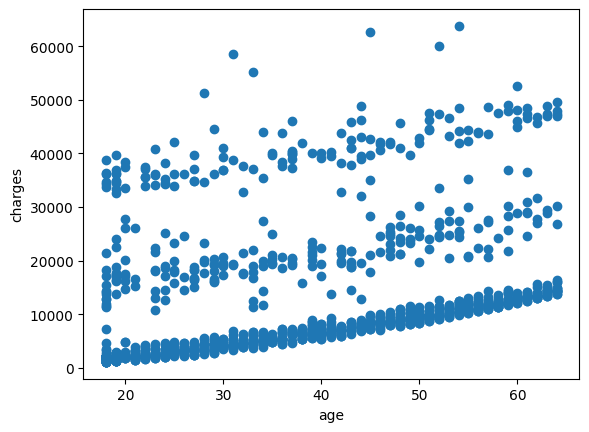

In [27]:
plt.scatter(insurance_filled['age'].to_numpy(), charges_arr)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

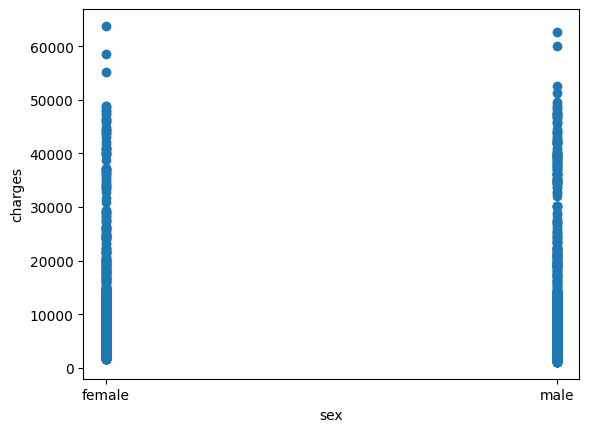

In [28]:
plt.scatter(insurance_filled['sex'].to_numpy(), charges_arr)
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()

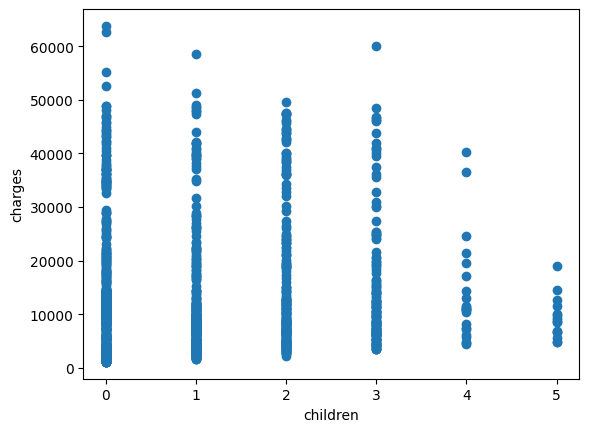

In [29]:
plt.scatter(insurance_filled['children'].to_numpy(), charges_arr)
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

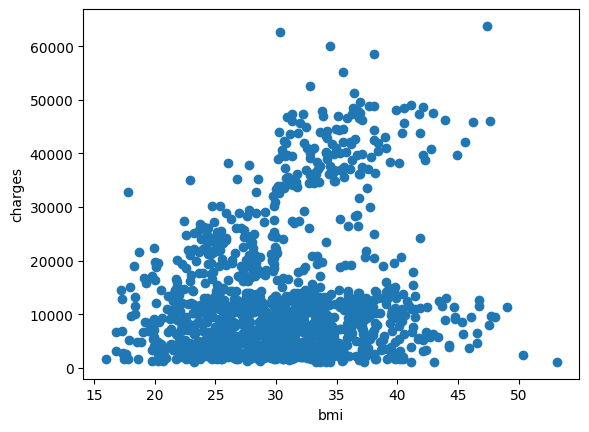

In [30]:
plt.scatter(insurance_filled['bmi'].to_numpy(), charges_arr)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

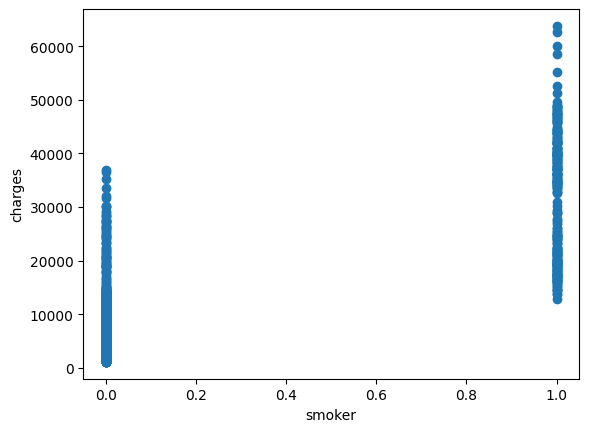

In [31]:
plt.scatter(insurance_filled['smoker'].to_numpy(), charges_arr)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

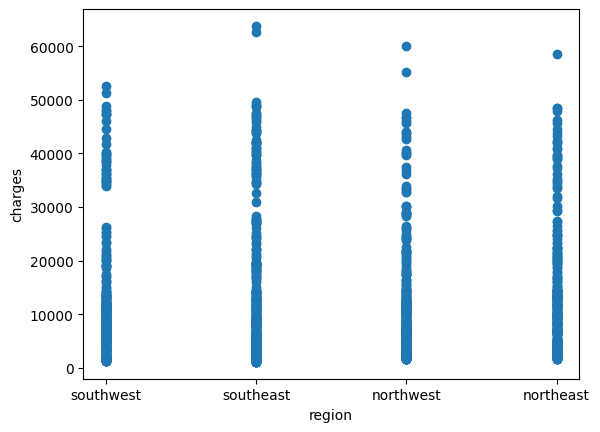

In [32]:
plt.scatter(insurance_filled['region'].to_numpy(), charges_arr)
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

## Well we didnt see any weird graphs like exponential, so linear regression model will be fine

## Task 3 :- Prepare data for model fitting

In [84]:
insurance_filled.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [93]:
y, X = insurance_filled['charges'], insurance_filled.drop(columns = ['charges'])

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ode = OrdinalEncoder()

In [97]:
ohe_pipeline = Pipeline(steps = [('one_hot_encoding', ohe)])
ode_pipeline = Pipeline(steps = [('ordinal_encoding', ode)])

In [98]:
ct = ColumnTransformer(transformers=[
                       ('ohe_pipeline', ohe_pipeline, ['region']),
                       ('ode_pipeline', ode_pipeline, ['smoker', 'sex'])],
                       remainder = 'passthrough',
                       n_jobs = -1)

In [39]:
#ct.set_output(transform='pandas')

In [40]:
#df = ct.fit_transform(X)

In [41]:
#df.head()

## Task 4 :- Fit linear regression model

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [100]:
final_pipe = Pipeline(steps = [
    ('column_transformer', ct),
    ('model', model)
])

In [101]:
final_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('ohe_pipeline',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['region']),
                                                 ('ode_pipeline',
                                                  Pipeline(steps=[('ordinal_encoding',
                                                                   OrdinalEncoder())]),
                                                  ['smoker', 'sex'])])),
                ('model', LinearRegression())])

## Task 5 :- Evaluate model on test set

In [102]:
y_pred = final_pipe.predict(X_test)

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test, y_pred)

0.7049323160872816

## Task 5 :- Feature Importance

In [117]:
# For other models
#feature_imp = final_pipe.named_steps['model'].feature_importances_

# For Linear Regression mode
feature_imp = final_pipe.named_steps['model'].coef_

In [118]:
# Getting transformed feature names

feature_names = final_pipe.named_steps['column_transformer'].get_feature_names_out()

In [119]:
feature_imp = pd.DataFrame(feature_imp, columns = ['imp_score'], index = feature_names)

In [115]:
insurance_filled.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [120]:
feature_imp.round(2)

,imp_score
ohe_pipeline__region_northeast,351.18
ohe_pipeline__region_northwest,293.33
ohe_pipeline__region_southeast,-428.18
ohe_pipeline__region_southwest,-216.33
ode_pipeline__smoker,24200.19
ode_pipeline__sex,-322.43
remainder__age,270.28
remainder__bmi,316.04
remainder__children,462.60


## Smoker is most important column for our model